## Importing Required Libraries & Dataset

In [27]:
# Importing libraries and dataset
import pandas as pd
df=pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


## Viewing Dataset

In [4]:
# Viewing sample 10 rows
df.sample(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
4790,1,Email,826915a3-7ec0-4c0c-a818-4ede41d70fb6,8,84.72,12,26,New Hampshire
13527,5,Email + Call,44760c8d-c29e-4be9-ac4c-7880d1077989,13,NaN,4,34,California
11087,1,Call,6c1513ab-827e-490f-92e9-8a995a0c220b,7,35.60,6,19,North Carolina
3731,5,Call,da542c10-a0d5-407e-8237-2168b9f53543,11,53.14,5,28,South Carolina
4231,5,Email + Call,9680ae42-8966-46a3-8412-c631dc0aec83,12,NaN,6,26,Texas
14137,2,Call,383fe808-5b3e-4509-961c-584c94eb3de1,9,43.75,1,30,West Virginia
37,5,Email,8e42cbad-8088-440c-b990-13989b7365d2,11,111.88,1,25,Louisiana
11651,2,Email,769162ec-baa9-4d79-b856-89951c1ba7f6,12,NaN,9,26,Indiana
9498,1,Email,aded32df-aa0b-4b42-80ad-49612455b5c5,9,89.07,2,23,Florida
5808,6,Call,fcbcbabb-fadd-4de5-b0a1-7c01feb8bc6b,13,66.39,2,36,Iowa


## Checking null values for each columns

In [28]:
#Checking number of null values in each columns
df.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

## Removing null values

In [29]:
# Removing null values
df.dropna(subset=['revenue'], inplace=True)

## Checking shape of dataset

In [30]:
# Checkin shape of the dataset
df.shape

(13926, 8)

## Checking information for each columns including null values and datatype

In [31]:
#Checking information for each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


## Checking statistical data

In [32]:
#Calculating statistical data
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13926.000000,13926.000000,13926.000000,13926.000000,13926.000000
mean,3.078271,10.040069,93.934943,4.978960,24.947006
std,1.650650,1.789690,47.435312,5.047828,3.491491
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,4.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,37.000000


## Removing outliers from each numerical columns

In [33]:
# Removing all outlier values from the numerical columns
import numpy as np
def remove_outliers_z_score(data, threshold=3):
    numerical_columns = data.select_dtypes(include=[np.number]).columns

    for col in numerical_columns:
        z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
        outliers = data[z_scores > threshold]
        data.drop(outliers.index, inplace=True)

# Remove outliers from all numerical columns using the Z-score method in the same DataFrame
remove_outliers_z_score(df)

## Replacing entity names for 'sales_method' column

In [34]:
# Renaming entities names for 'sales_method' column
df['sales_method'] = df['sales_method'].replace('email', 'Email')
df['sales_method'] = df['sales_method'].replace('em + call', 'Email + Call')

# Analyzing Customer Count for Each Approach

In [35]:
# Calculate customer count for each sales method
customer_count = df['sales_method'].value_counts()
print(customer_count)

Email           6804
Call            4684
Email + Call    2153
Name: sales_method, dtype: int64


 # Revenue Analysis

count    13641.000000
mean        93.693052
std         47.010260
min         32.540000
25%         52.470000
50%         89.500000
75%        107.240000
max        232.360000
Name: revenue, dtype: float64
sales_method
Call            223086.20
Email           661097.61
Email + Call    393883.11
Name: revenue, dtype: float64


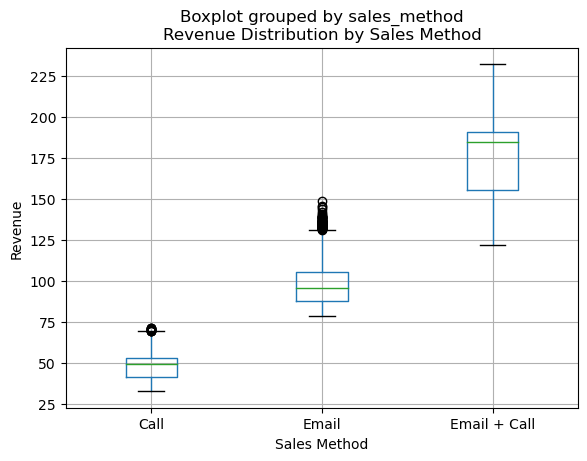

In [36]:
# Overall revenue statistics
overall_revenue_stats = df['revenue'].describe()
print(overall_revenue_stats)

# Revenue by sales method
revenue_by_method = df.groupby('sales_method')['revenue'].sum()
print(revenue_by_method)

# Visualize revenue distribution
import matplotlib.pyplot as plt

df.boxplot(column='revenue', by='sales_method')
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

# Revenue Over Time for Each Method

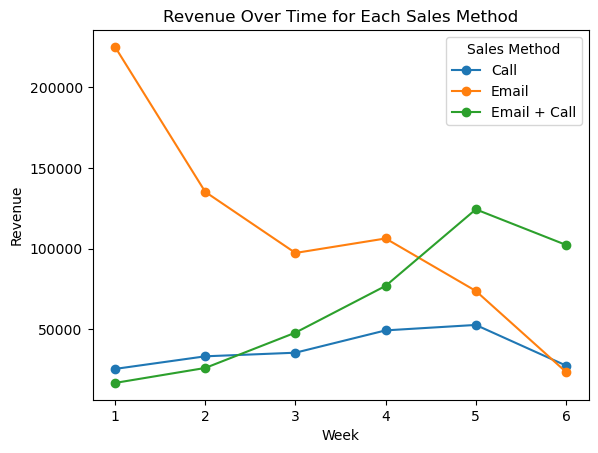

In [38]:
# Group data by week and sales method to track revenue over time
revenue_over_time = df.groupby(['week', 'sales_method'])['revenue'].sum().unstack()

# Plot revenue over time for each sales method
revenue_over_time.plot(kind='line', marker='o')
plt.title('Revenue Over Time for Each Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.show()

# Correlation

In [39]:
# Correlation between sales methods and customer characteristics
correlation = df.groupby('sales_method').corr()
print(correlation)

                                    week   nb_sold   revenue  \
sales_method                                                   
Call         week               1.000000  0.909223  0.928632   
             nb_sold            0.909223  1.000000  0.985769   
             revenue            0.928632  0.985769  1.000000   
             years_as_customer -0.098607 -0.102475 -0.104476   
             nb_site_visits     0.471559  0.505480  0.511259   
Email        week               1.000000  0.777638  0.804183   
             nb_sold            0.777638  1.000000  0.967878   
             revenue            0.804183  0.967878  1.000000   
             years_as_customer -0.059581 -0.081800 -0.081137   
             nb_site_visits     0.320519  0.372718  0.378990   
Email + Call week               1.000000  0.938005  0.941559   
             nb_sold            0.938005  1.000000  0.989515   
             revenue            0.941559  0.989515  1.000000   
             years_as_customer -0.093309

C:\Users\Mukul\AppData\Local\Temp\ipykernel_26848\1169873184.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  correlation = df.groupby('sales_method').corr()


# Visualisations

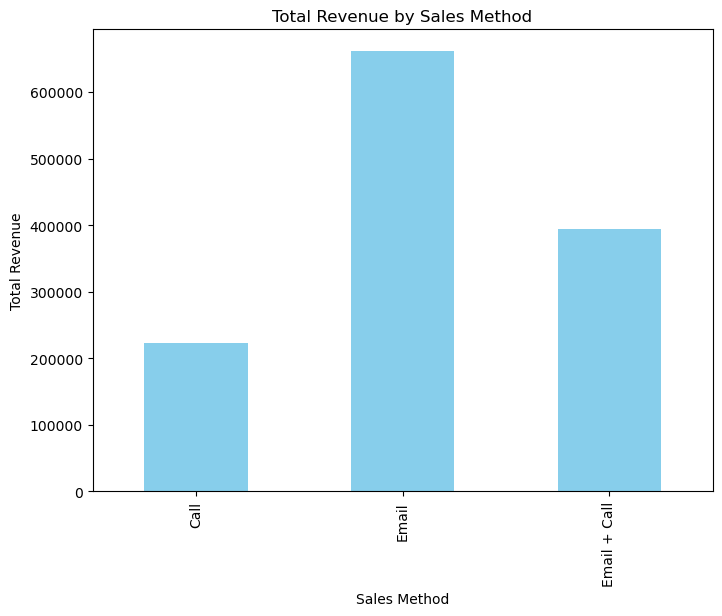

<Figure size 800x600 with 0 Axes>

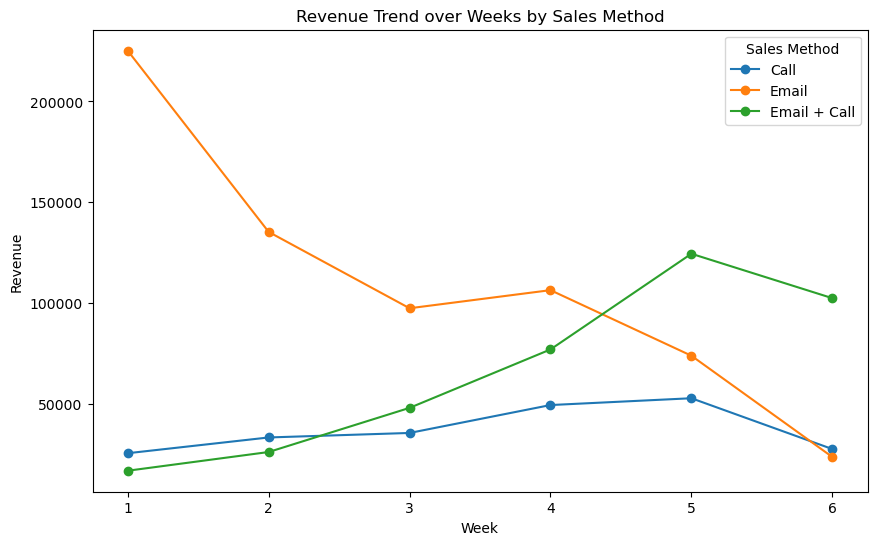

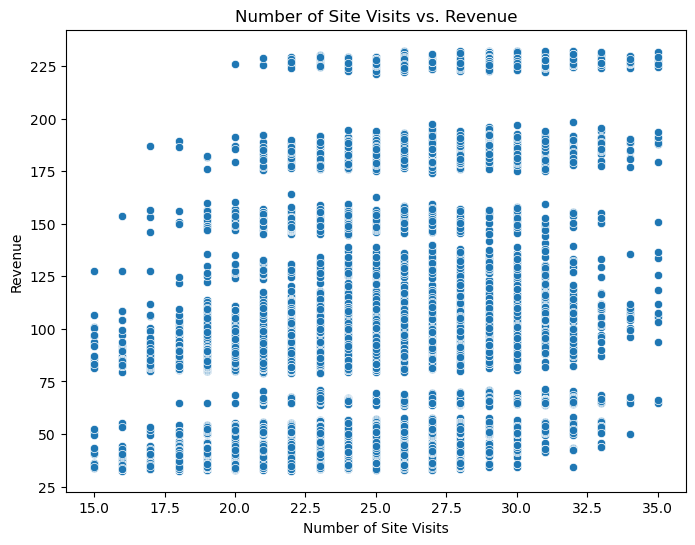

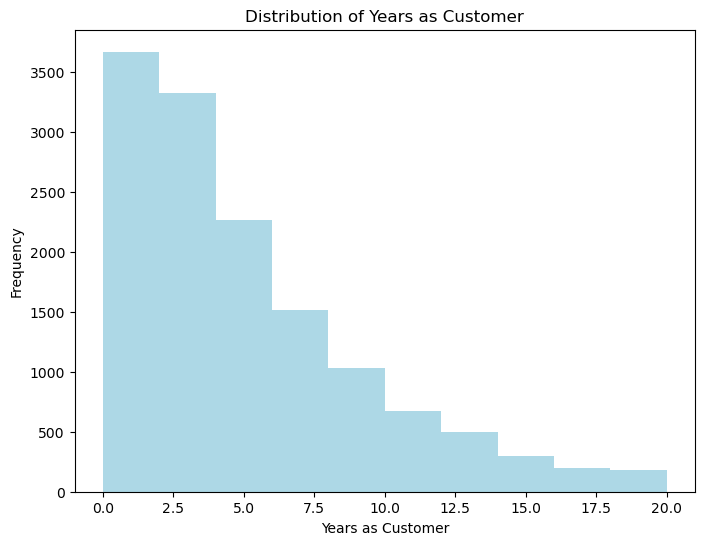

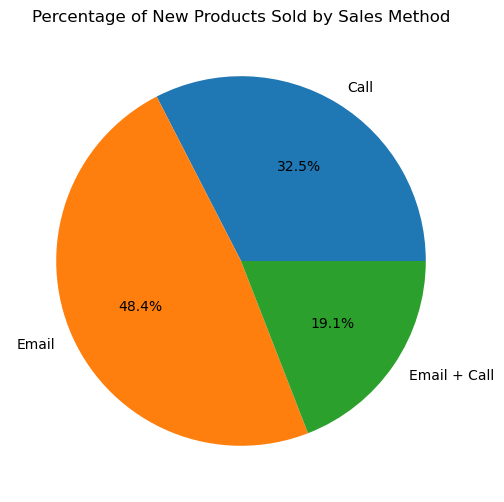

C:\Users\Mukul\AppData\Local\Temp\ipykernel_26848\858472515.py:49: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


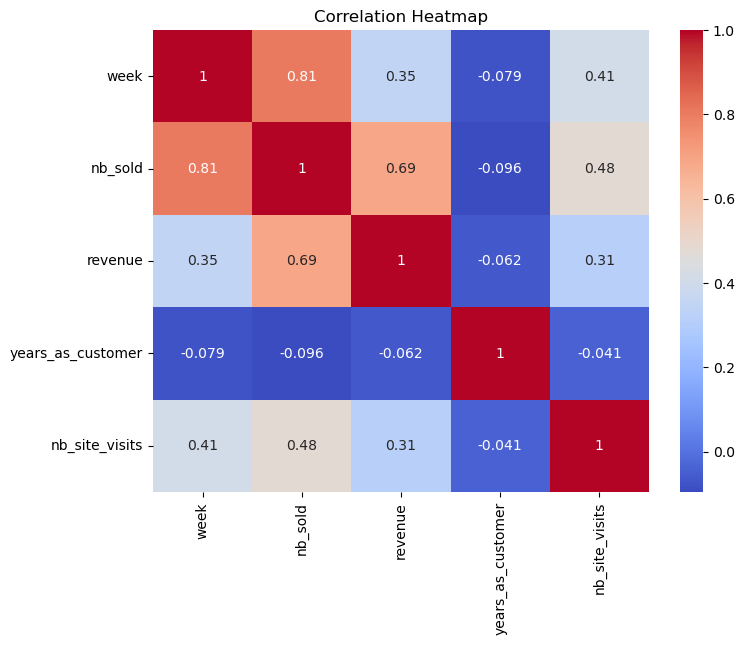

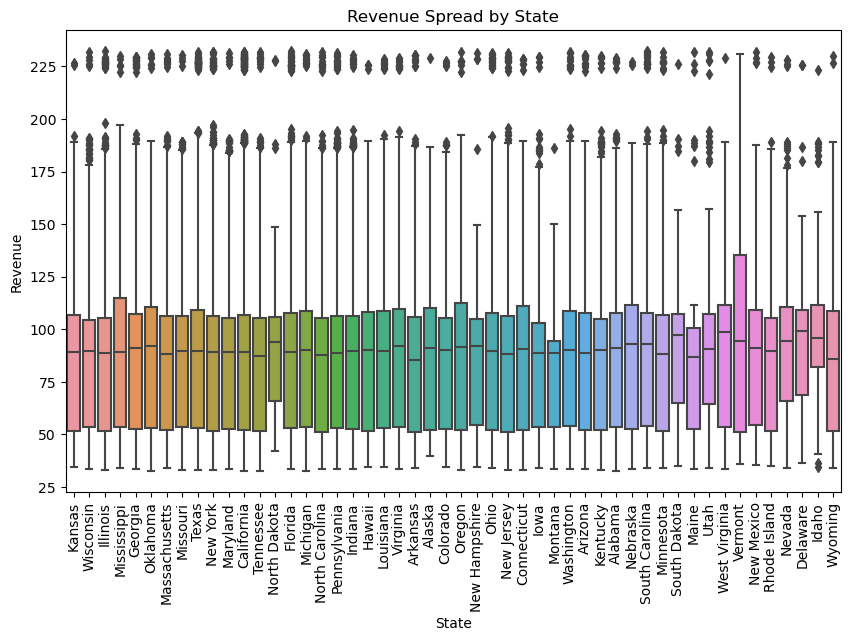

<Figure size 1000x600 with 0 Axes>

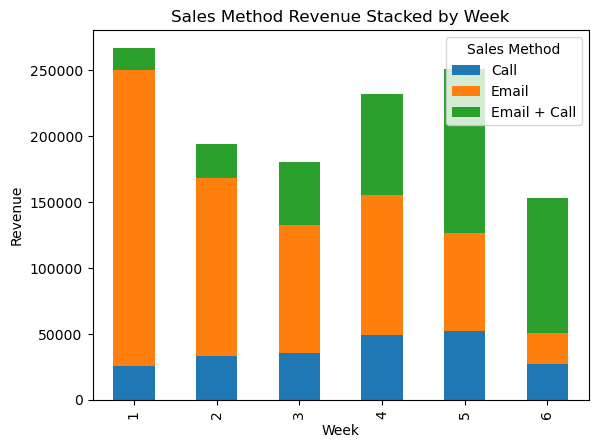

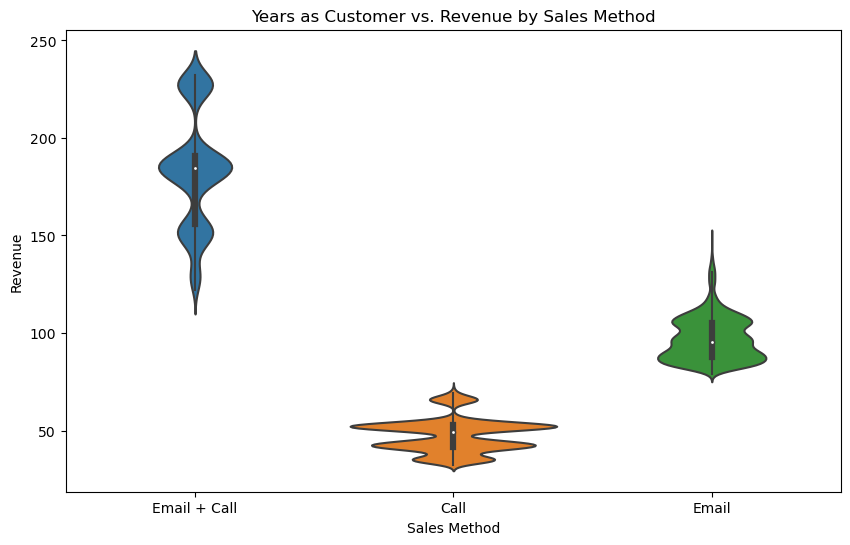

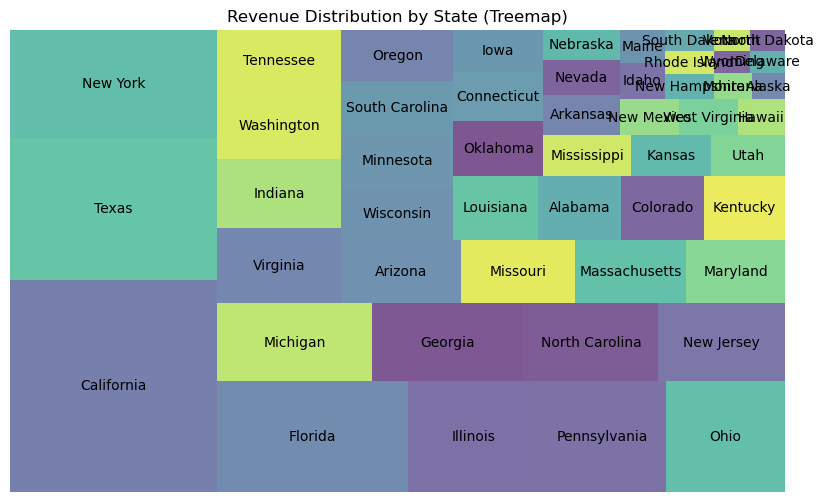

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart - Sales Method vs. Total Revenue
total_revenue_by_method = df.groupby('sales_method')['revenue'].sum()
plt.figure(figsize=(8, 6))
total_revenue_by_method.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Total Revenue')
plt.show()

# Line Chart - Revenue Trend over Weeks
plt.figure(figsize=(8, 6))
revenue_over_time = df.groupby(['week', 'sales_method'])['revenue'].sum().unstack()
revenue_over_time.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Revenue Trend over Weeks by Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.show()

# Scatter Plot - Number of Site Visits vs. Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='nb_site_visits', y='revenue', data=df)
plt.title('Number of Site Visits vs. Revenue')
plt.xlabel('Number of Site Visits')
plt.ylabel('Revenue')
plt.show()

# Histogram - Distribution of Years as Customer
plt.figure(figsize=(8, 6))
plt.hist(df['years_as_customer'], bins=10, color='lightblue')
plt.title('Distribution of Years as Customer')
plt.xlabel('Years as Customer')
plt.ylabel('Frequency')
plt.show()

# Pie Chart - Percentage of New Products Sold by Method
plt.figure(figsize=(8, 6))
df.groupby('sales_method')['nb_sold'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of New Products Sold by Sales Method')
plt.ylabel('')
plt.show()

# Heatmap - Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Box Plot - Revenue Spread by State
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='revenue', data=df)
plt.title('Revenue Spread by State')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

# Stacked Bar Chart - Sales Method vs. Revenue Stacked by Week
plt.figure(figsize=(10, 6))
revenue_over_time.plot(kind='bar', stacked=True)
plt.title('Sales Method Revenue Stacked by Week')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.show()

# Violin Plot - Years as Customer vs. Revenue by Sales Method
plt.figure(figsize=(10, 6))
sns.violinplot(x='sales_method', y='revenue', data=df)
plt.title('Years as Customer vs. Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

# Treemap - Revenue Distribution by State
import squarify
plt.figure(figsize=(10, 6))
state_revenue = df.groupby('state')['revenue'].sum().sort_values(ascending=False)
squarify.plot(sizes=state_revenue, label=state_revenue.index, alpha=0.7)
plt.axis('off')
plt.title('Revenue Distribution by State (Treemap)')
plt.show()